## Contents

This script is looking into the frequency of the levels of participation and the models for each level

In [171]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

### 1. Importing Data

In [172]:
#creating a path
path= r'C:\Users\isobr\OneDrive\18042023ParticipationPractices'

In [173]:
path

'C:\\Users\\isobr\\OneDrive\\18042023ParticipationPractices'

In [174]:
#importing the excel dataset
df = pd.read_excel(os.path.join(path, 'practices_full.xlsx'), index_col = False)

In [175]:
df.head()

,ID,title,CS,source,year_pub,year_pro,publisher,link,technology,province_state,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
0,a1,Popular and institutional opposition to the Se...,yes,Wiki,2022,2021.0,EJ Atlas,https://ejatlas.org/conflict/popular-and-insti...,Onshore Wind,"l'Anoia, Catalonia",...,0,0,1,1,0,0,0,2,6,Moderate negative
1,a2,Proteste gegen Verspargelung und Flächenfraß,yes,News media,2019,2019.0,deutschlandfunk Kultur,https://www.deutschlandfunkkultur.de/windenerg...,Onshore Wind,Mecklenburg-Western Pomerania,...,0,0,0,0,0,0,0,0,3,Moderate negative
2,a3,Greta Thunberg has joined a protest against wi...,yes,News media,2023,2021.0,CNN,https://edition.cnn.com/2023/03/01/europe/gret...,Onshore Wind,Fosen,...,0,0,0,0,0,0,0,0,3,Moderate negative
3,a4,"Combining offshore wind farms, nature conserva...",no,Journal article,2021,2021.0,Marine Policy,https://www.sciencedirect.com/science/article/...,Offshore Wind,NaN,...,0,0,1,0,0,0,0,1,4,Neutral
4,a5,Learning from the social impacts associated wi...,yes,Journal article,2021,2008.0,Impact Assessment and Project Appraisal,https://www.tandfonline.com/doi/full/10.1080/1...,On and Offshore,Urk,...,1,0,0,1,0,0,1,3,6,Moderate negative


In [176]:
df.shape

(399, 70)

In [177]:
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'technology', 'province_state', 'country', 'region',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

### 2. Overview of Year and Levels of Participation

Text(0.5, 1.0, 'Year of Projects')

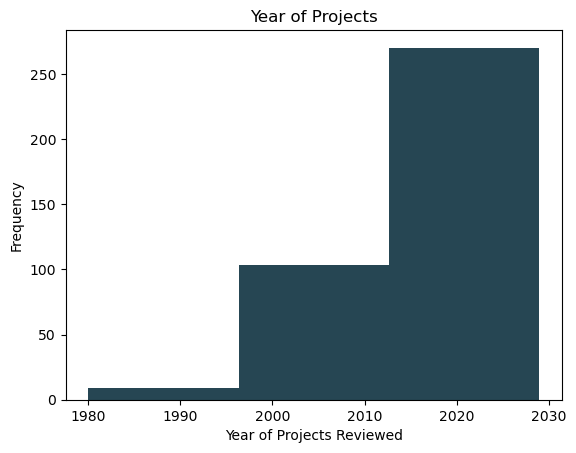

In [178]:
#histogram of year of projects 
hist_practices=df['year_pro'].plot.hist(color='#264653', bins = 3)
plt.xlabel('Year of Projects Reviewed', fontsize=10)
plt.title('Year of Projects')

Text(0.5, 1.0, 'Year of Publications')

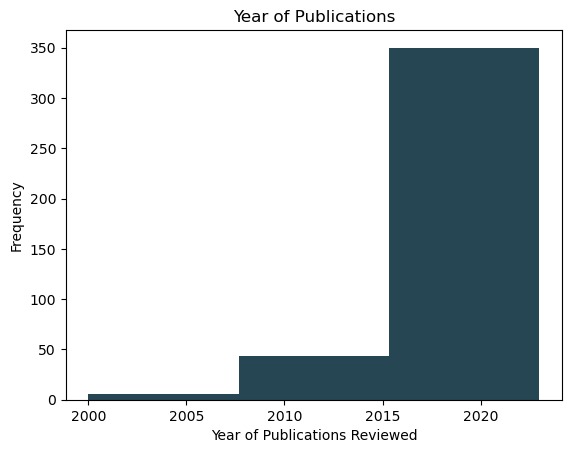

In [179]:
#histogram of year of publications reviewed
hist_pub=df['year_pub'].plot.hist(color='#264653', bins = 3)
plt.xlabel('Year of Publications Reviewed', fontsize=10)
plt.title('Year of Publications')

Text(0.5, 1.0, 'Distribution of Levels of Participation')

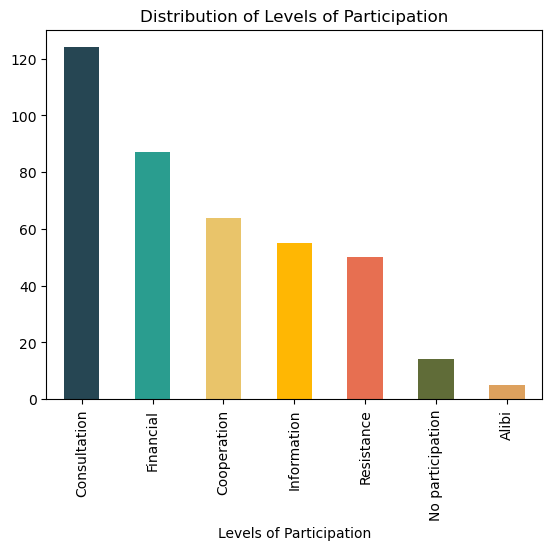

In [180]:
#Distribution of levels of participation
df['main_level'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Levels of Participation", fontsize=10)
plt.title('Distribution of Levels of Participation')

### 3. Mandate, Opportunities and Timing for Participation

In [181]:
#compare mandate with the level of participation
man = (
    df                                                                                       
    .groupby('mandate')['level_score'].mean()                        
    .reset_index()
    .sort_values('level_score', ascending = False)
    .iloc[:10]
)
man

,mandate,level_score
2,Voluntary,4.254545
0,Legal Obligation,3.708861
1,Not applicable,2.711111


Text(0.5, 1.0, 'Mandate for Participation by Score of Participation')

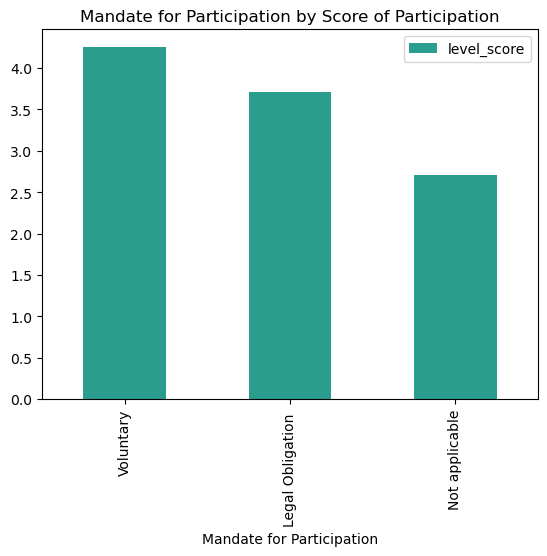

In [182]:
man.set_index('mandate').plot.bar(color = '#2A9D8F')
plt.xlabel("Mandate for Participation", fontsize=10)
plt.title('Mandate for Participation by Score of Participation')

Text(0.5, 1.0, 'Distribution of Opportunities for Participation')

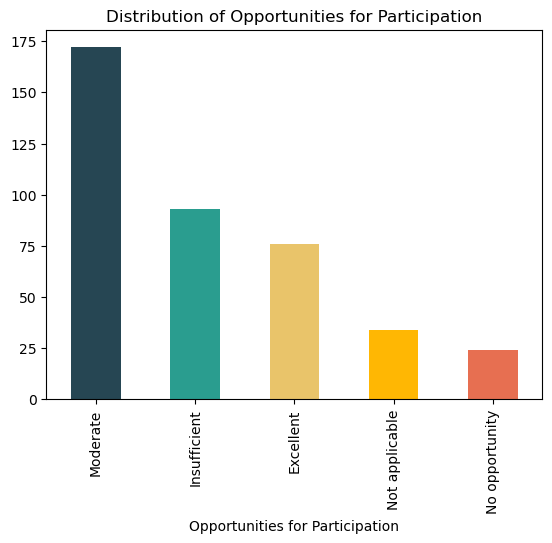

In [183]:
#Distribution of opportunities for participation
df['opportunities'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Opportunities for Participation", fontsize=10)
plt.title('Distribution of Opportunities for Participation')

In [184]:
# compare the timing of participation and opportunities

time = (
    df                                                                                       
    .groupby('timing')['opportunities_score'].mean()                        
    .reset_index()
    .sort_values('opportunities_score', ascending = False)
    .iloc[:10]
)
time

,timing,opportunities_score
7,Throughout,3.356164
4,More than one stage,2.800000
2,Exploration,2.685185
6,Planning,2.645161
3,Maintenance,2.375000
0,Construction,2.166667
5,No information,1.935897
1,Decommission,0.000000


Text(0.5, 1.0, 'Timing of Participation and Opportunities')

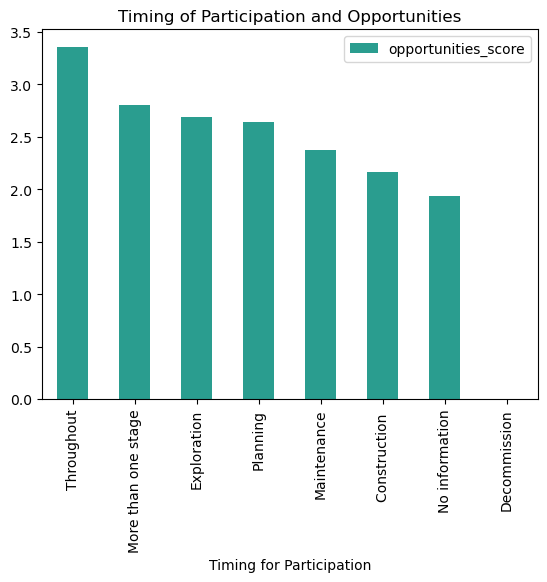

In [185]:
time.set_index('timing').plot.bar(color='#2A9D8F')
plt.xlabel("Timing for Participation", fontsize=10)
plt.title('Timing of Participation and Opportunities')

Text(0.5, 1.0, 'Moments when Participation Occurs')

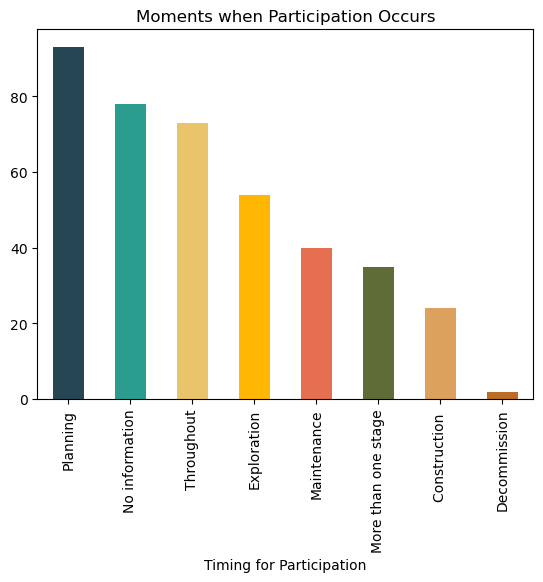

In [186]:
#Distribution of timing for participation
df['timing'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Timing for Participation", fontsize=10)
plt.title('Moments when Participation Occurs')

### 4. Models of Participation

Text(0.5, 1.0, 'Models of Participation for Alibi Participation')

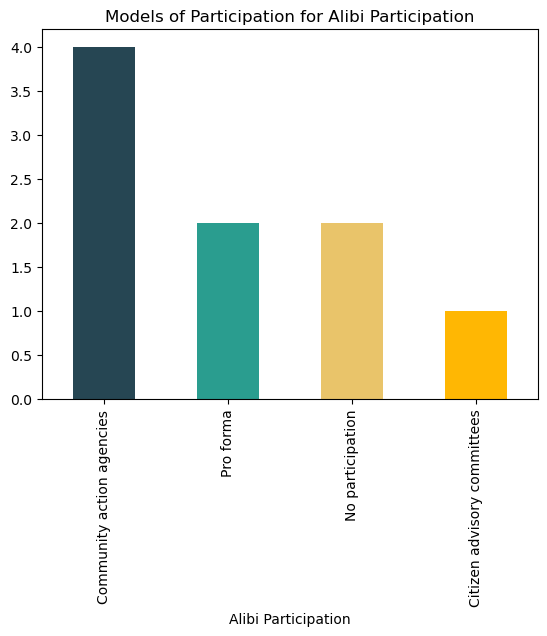

In [187]:
#frequency of models found for alibi
df['alibi'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Alibi Participation", fontsize=10)
plt.title('Models of Participation for Alibi Participation')

Text(0.5, 1.0, 'Models of Participation for Resistance')

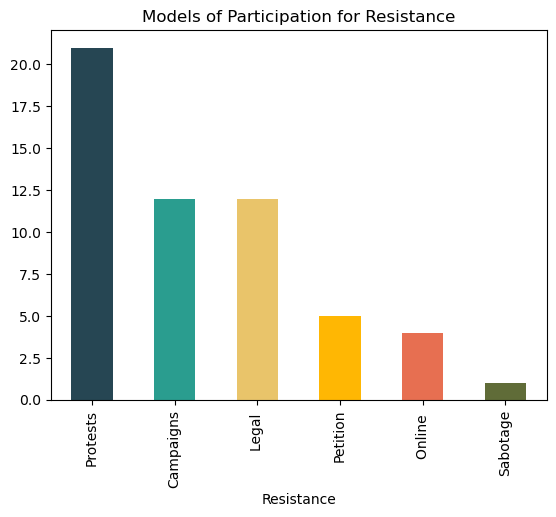

In [188]:
df['resistance'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Resistance", fontsize=10)
plt.title('Models of Participation for Resistance')

Text(0.5, 1.0, 'Models of Participation for Information')

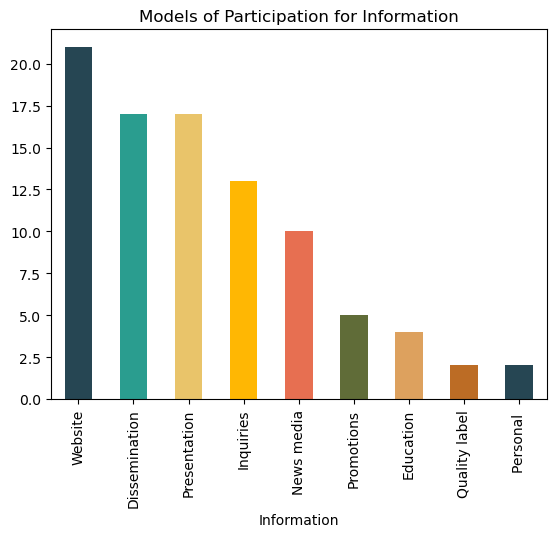

In [189]:
df['information'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Information", fontsize=10)
plt.title('Models of Participation for Information')

Text(0.5, 1.0, 'Models of Participation for Consultation')

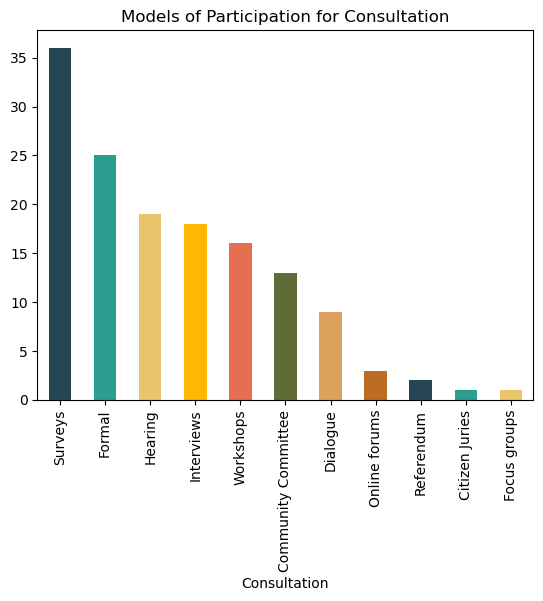

In [190]:
df['consultation '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Consultation", fontsize=10)
plt.title('Models of Participation for Consultation')

Text(0.5, 1.0, 'Models of Participation for Financial Participation')

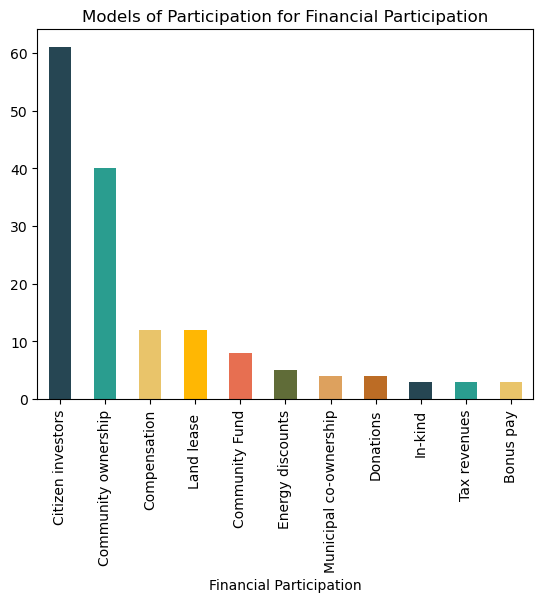

In [191]:
df['financial '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Financial Participation", fontsize=10)
plt.title('Models of Participation for Financial Participation')

Text(0.5, 1.0, 'Models of Participation for Cooperation')

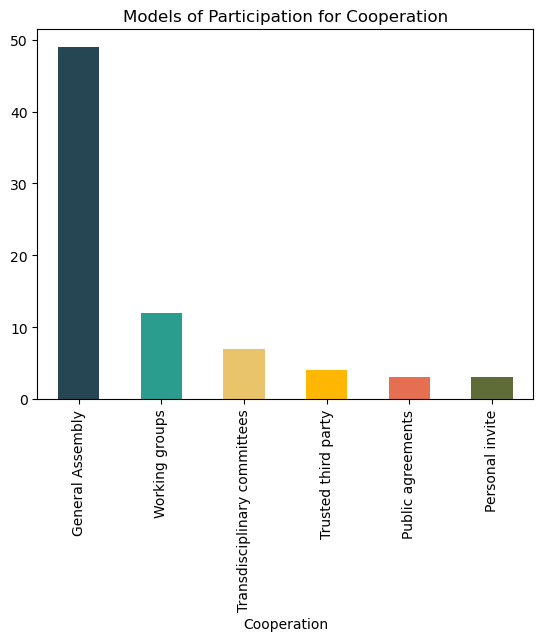

In [192]:
#frequency of models found for cooperation
df['cooperation '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Cooperation", fontsize=10)
plt.title('Models of Participation for Cooperation')

##### Subsetting the data to check for other levels within each main level

In [193]:
#subset alibi
df2=df[df['main_level']== 'Alibi']

Text(0.5, 1.0, 'Other Levels for Alibi Participation')

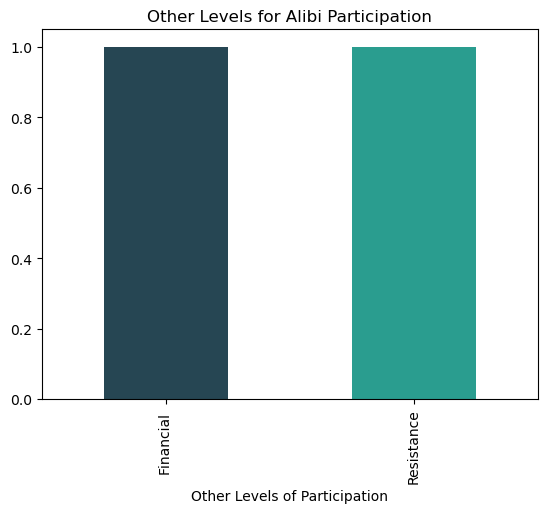

In [194]:
#checking other levels
df2['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Alibi Participation')

In [195]:
#subset resistance
df3=df[df['main_level']== 'Resistance']

Text(0.5, 1.0, 'Other Levels for Resistance')

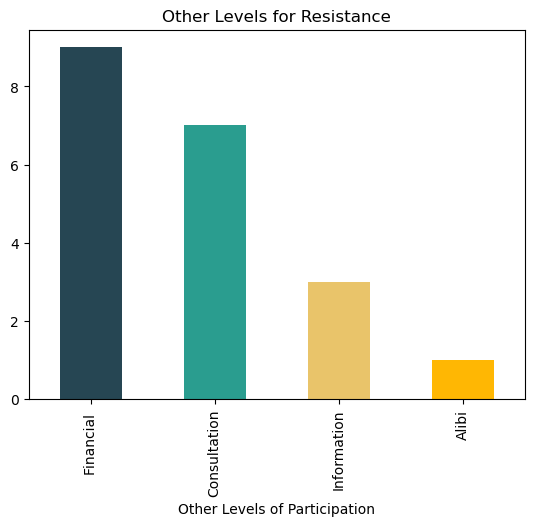

In [196]:
#checking other levels
df3['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Resistance')

In [197]:
#subset information
df4=df[df['main_level']== 'Information']

Text(0.5, 1.0, 'Other Levels for Information')

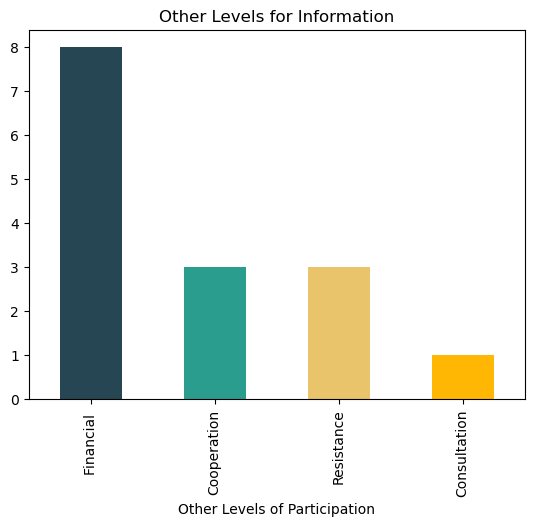

In [198]:
#checking other levels
df4['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Information')

In [199]:
#subset consultation
df5=df[df['main_level']== 'Consultation']

Text(0.5, 1.0, 'Other Levels for Consultation')

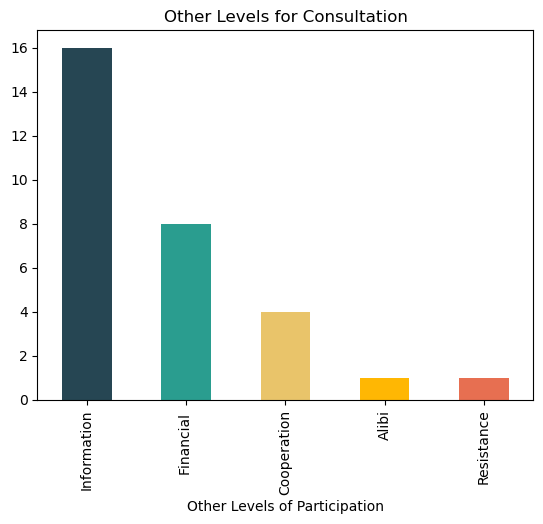

In [200]:
#checking other levels
df5['other_levels'].value_counts().plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Consultation')

In [201]:
#subset financial
df6=df[df['main_level']== 'Financial']

Text(0.5, 1.0, 'Other Levels for Financial Participation')

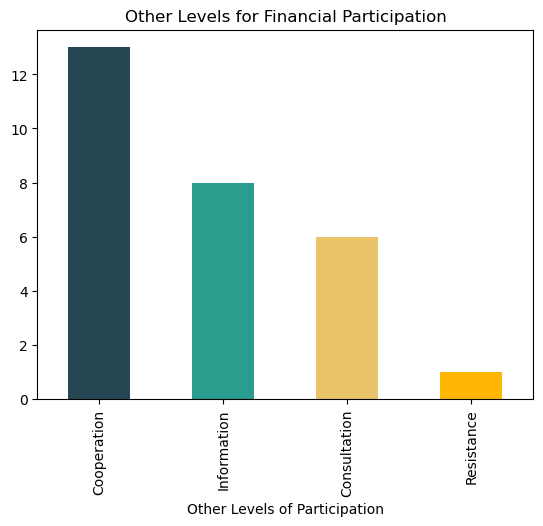

In [202]:
#checking other levels
df6['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Financial Participation')

In [203]:
#subset cooperation
df7=df[df['main_level']== 'Cooperation']

Text(0.5, 1.0, 'Other Levels for Cooperation')

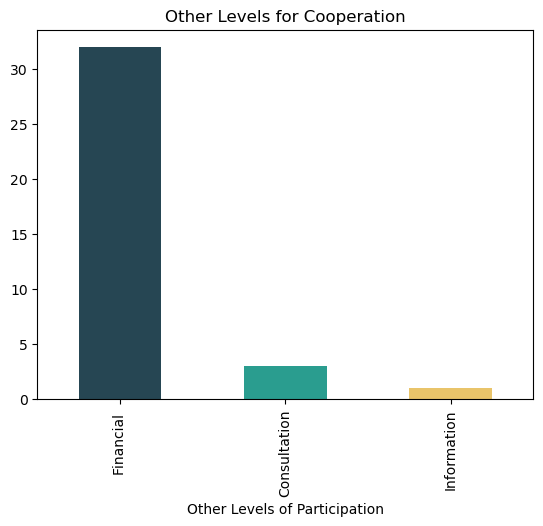

In [204]:
#checking other levels
df7['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Cooperation')